In [2]:
line_colours = {
    "Jubilee Line" : "darkgrey",
    "IFS Cloud Cable Car" : "lime",
    "Central Line" : "red",
    "Overground" : "darkorange",
    "Elizabeth Line" : "darkviolet",
    "Piccadilly Line" : "darkblue",
    "Hammersmith and City Line" : "palevioletred",
    "DLR" : "mediumturquoise",
    "Bakerloo Line" : "saddlebrown",
    "Circle Line" : "yellow",
    "Tram" : "yellowgreen",
    "Metropolitan Line" : "mediumvioletred",
    "Northern Line" : "black",
    "Waterloo and City Line" : "olivedrab",
    "District Line" : "mediumseagreen",
    "Victoria Line" : "deepskyblue"
    
}

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os

stations_list = pd.read_excel("All Stations.xlsx")
index_to_station_name = {}
station_name_to_index = {}
for i,station in enumerate(stations_list['Station']):
    index_to_station_name[i] = station
    station_name_to_index[station] = i

df = pd.DataFrame()
for filename in os.listdir("Lines"):
    if filename.endswith('.xlsx'):
        file = os.path.join("Lines", filename)
        df_new = pd.read_excel(file)
        df_new["Line"] = filename.split(".")[0]
        df = pd.concat([df, df_new], ignore_index=True)

G = nx.DiGraph()

for _, row in df.iterrows():
    start_index = station_name_to_index[row['Start']]
    end_index = station_name_to_index[row['End']]
    if row['Directed'] == 1:  # Directed edge
        G.add_edge(start_index, end_index, weight=row['Time'], color=line_colours[row["Line"]])
    else:  # Undirected edge
        G.add_edge(start_index, end_index, weight=row['Time'], color=line_colours[row["Line"]])
        G.add_edge(end_index, start_index, weight=row['Time'], color=line_colours[row["Line"]]) # Adding the reverse as well


# Get edge weights for visual representation
weights = [G[u][v]['weight'] for u, v in G.edges()]
colours = [G[u][v]['color'] for u,v in G.edges()]

In [5]:
positions_df = pd.read_excel("Station Coordinates.xlsx") 
pos = {}
for i, row in positions_df.iterrows():
    station_index = station_name_to_index[row["Station"]]
    pos[station_index] = (float(row["Point"].split(" ")[1][1:]), float(row["Point"].split(" ")[2][:-1]))

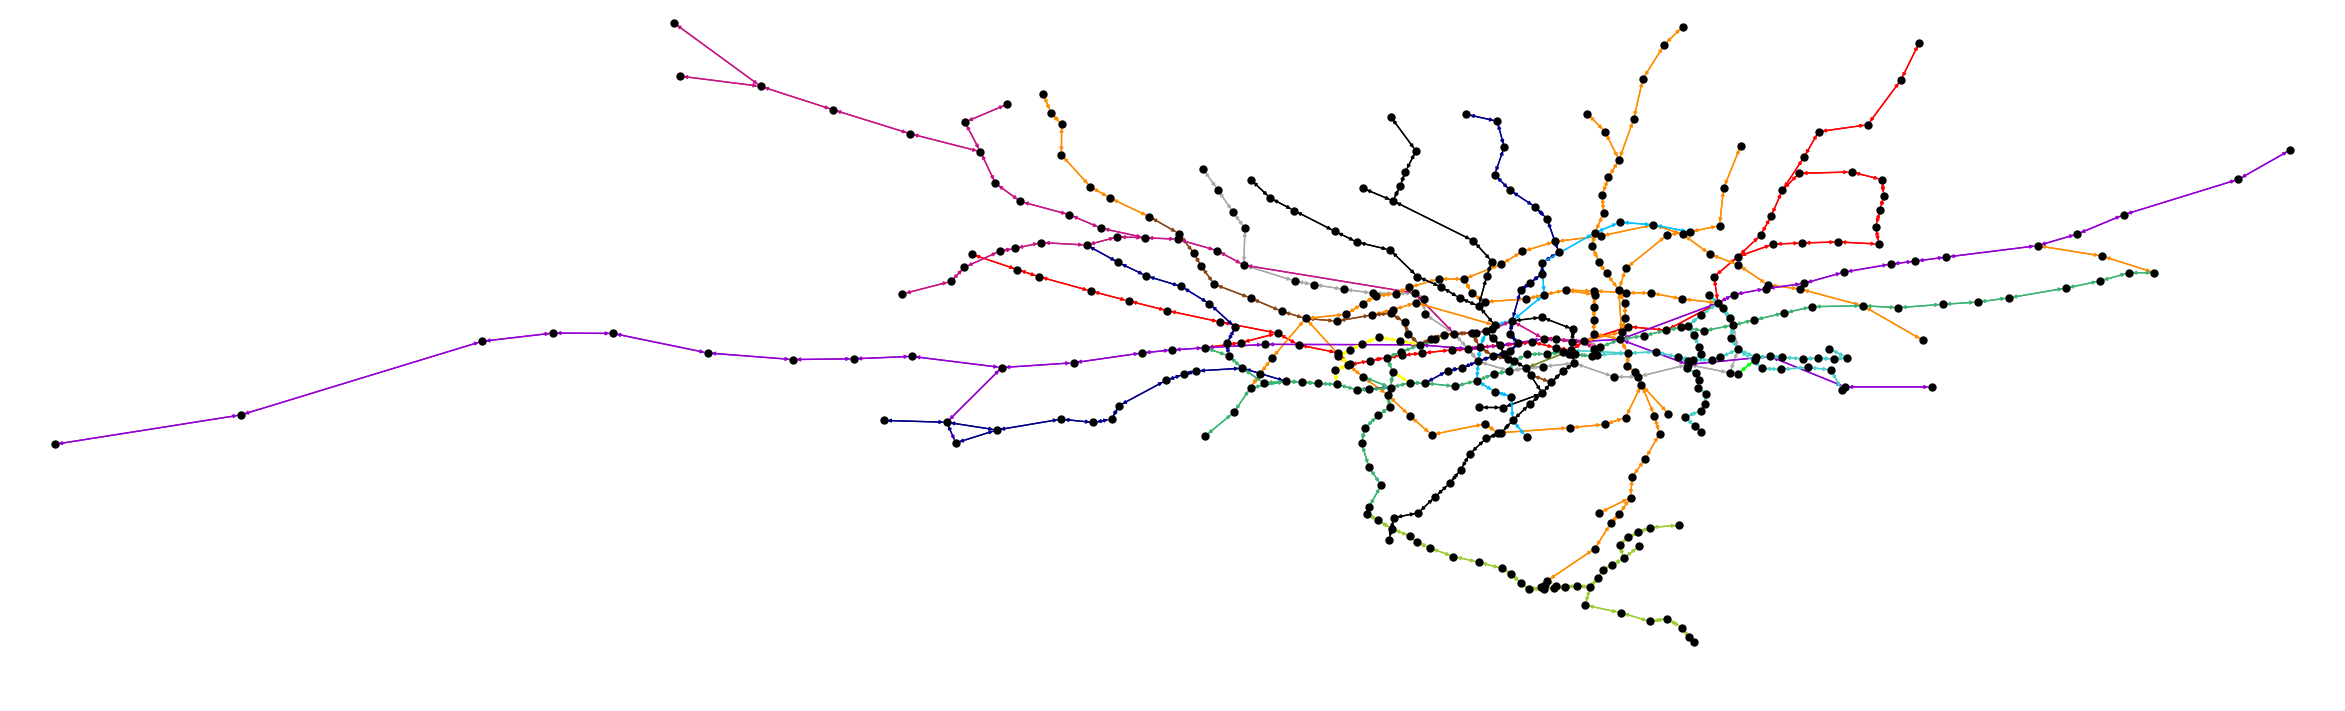

In [12]:
# Get the coordinates bounds
x_coords = [coord[0] for coord in pos.values()]
y_coords = [coord[1] for coord in pos.values()]
x_min, x_max = min(x_coords), max(x_coords)
y_min, y_max = min(y_coords), max(y_coords)

# Calculate aspect ratio
width = x_max - x_min
height = y_max - y_min
aspect_ratio = width / height

# Create figure with proper aspect ratio
plt.figure(figsize=(30, 30/aspect_ratio))  # Adjust the 30 to make it bigger or smaller

# Turn off axes
plt.axis('off')

# Draw the network
nx.draw_networkx(G,
                pos=pos,
                with_labels=False,
                node_size=25,
                node_color='black',
                font_size=8,
                arrowsize=5,
                edge_color=colours,
                arrowstyle='-|>')

# Set the plot limits with a small margin
margin = 0.02  # Adjust this value to change the margin size
plt.xlim(x_min - width*margin, x_max + width*margin)
plt.ylim(y_min - height*margin, y_max + height*margin)

plt.show()

In [19]:
pos = nx.spring_layout(G)

In [ ]:
plt.figure(figsize=(30, 30/aspect_ratio))
nx.draw_networkx(G,
                pos=pos,
                with_labels=False,
                node_size=25,
                node_color='black',
                font_size=8,
                arrowsize=5,
                edge_color=colours,
                arrowstyle='-|>')
plt.show()

In [9]:
# Basic Graph Properties
print("Basic Network Properties:")
print(f"Number of nodes (stations): {G.number_of_nodes()}")
print(f"Number of edges (connections): {G.number_of_edges()}")
print(f"Network density: {nx.density(G):.3f}")  # How connecte

Basic Network Properties:
Number of nodes (stations): 456
Number of edges (connections): 1059
Network density: 0.005
